# About Dataset

This dataset contains the various details of a person and their income. The target variable is income and we have to predict by taking various details wheater the person haviing the same will earn more than 50k or not.

***Features:***
1. Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

2. Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

3. Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

4. Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation

5. Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

6. Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

7. Sex: Female, Male.

8. Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Individual's native country.
9. Age: continuous. Age of an individual

10. fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

11. Capital-gain: continuous.

12. Capital-loss: continuous.

13. Hours-per-week: continuous. Individual's working hour per week

14. Income: is the dependent or target variable

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("adult.csv")
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We have total 48842 rows and 15 columns.

In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In age column, minimum age is 17, maximum age is 90 and 50% of people's are 37 year's old.

In [ ]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

We don't have any null value in dataset.

`Checking the unique value each categorical data contains.`

In [ ]:
cat_feat = [feature for feature in data.columns if data[feature].dtype == 'O']
cat_feat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [ ]:
for i in cat_feat:
  print("Unique values in",i)
  print(data[i].value_counts(),"\n")

Unique values in workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

Unique values in education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Unique values in marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Unique val

We have a feature as **'?'** in **workclass, occupation and native-country** which is not a valid among the rest, so it is a null value.

# Univariate Analysis

## Numerical Column Analysis

In [ ]:
num_feat = [feature for feature in data.columns if data[feature].dtype != 'O']
num_feat

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

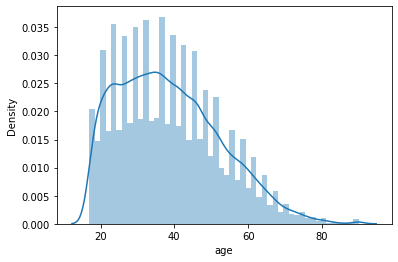

In [ ]:
sns.distplot(data['age'])

Majority of peoples age lie between 20 to 70, and age above 70 considered as outliers.

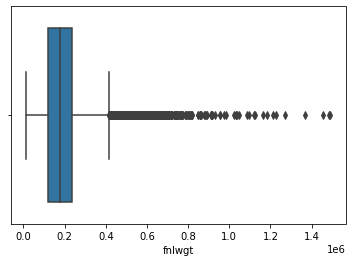

In [ ]:
sns.boxplot(data['fnlwgt'])

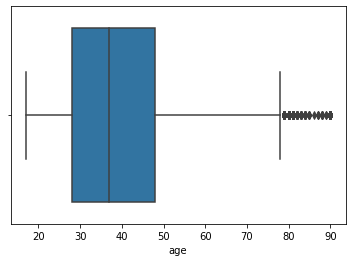

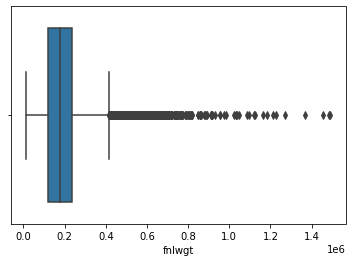

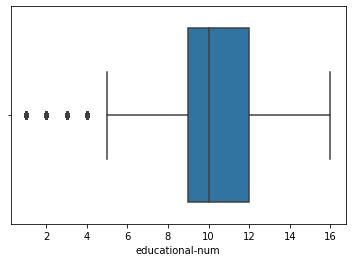

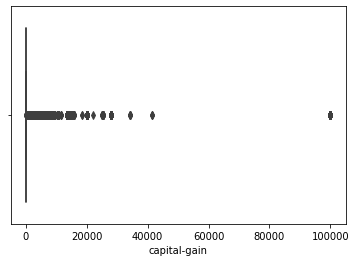

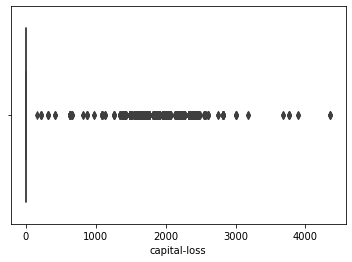

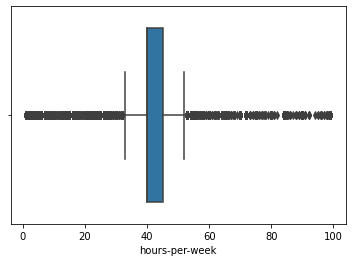

In [ ]:
for i in num_feat:
  plt.figure(i)
  sns.boxplot(data[i])

We have an outliers in every numerical column.

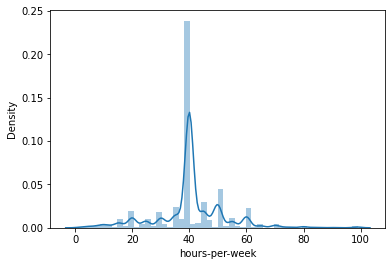

In [ ]:
sns.distplot(data['hours-per-week'])

Most peoples work for 40 hours per week.

Less than 20 hours and greater than 80 hours  per week which is unusual and considered as outlier in hours-per-week column.

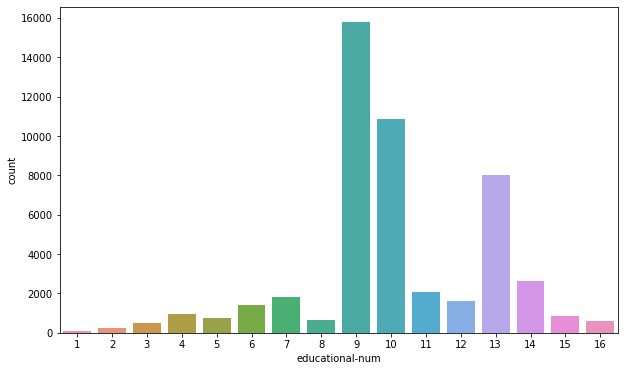

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['educational-num'])
plt.show()

In educational-num column, 9 has the highest count among all.

## Categorical Column Analysis

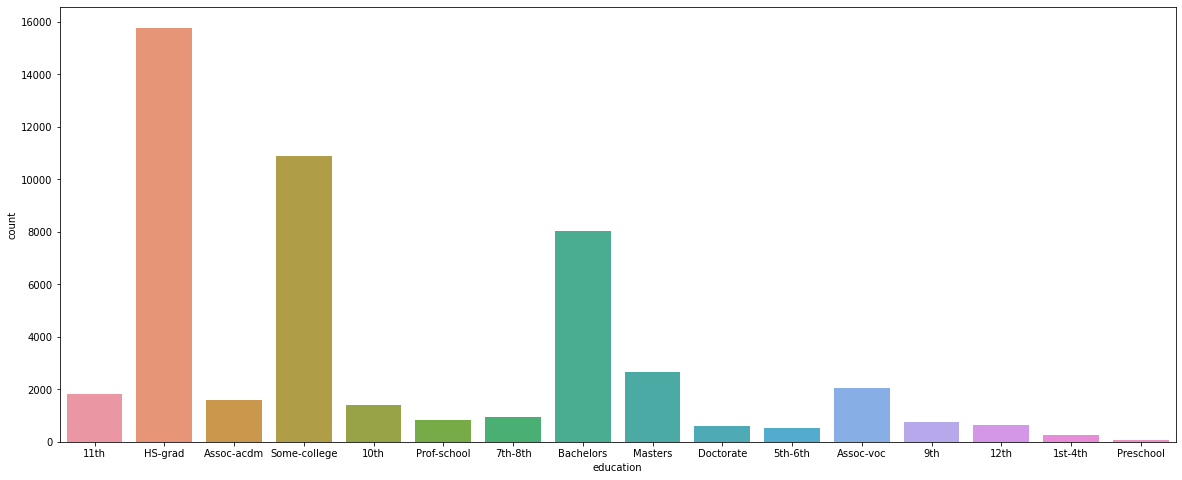

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data['education'])
plt.show()

Most of the people's studied in HS-grad.

Among all only few had done preschool.

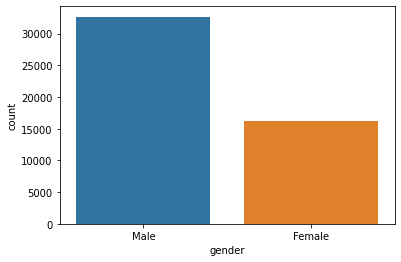

In [ ]:
sns.countplot(data['gender'])

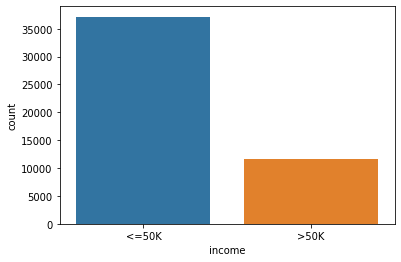

In [ ]:
sns.countplot(data['income'])

Most of the people's have income less than or equall to 50k, only approx 12k people's have income more 50k.

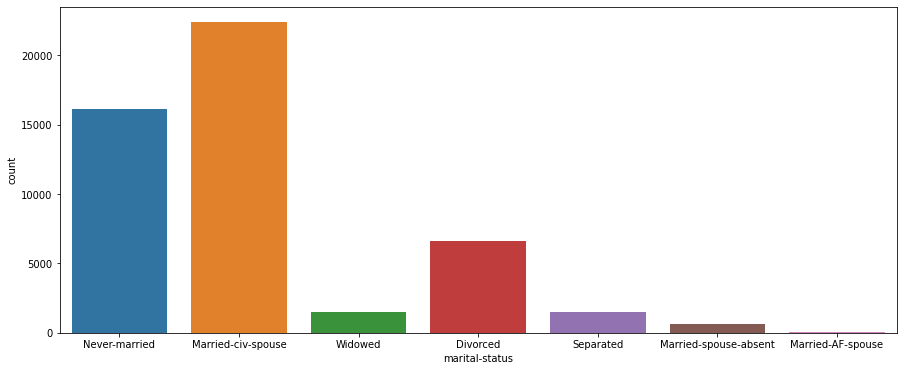

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data['marital-status'])
plt.show()

Most of the people's are civilian spouses. And there are less peoples, whose spouses are working at Armed Forces

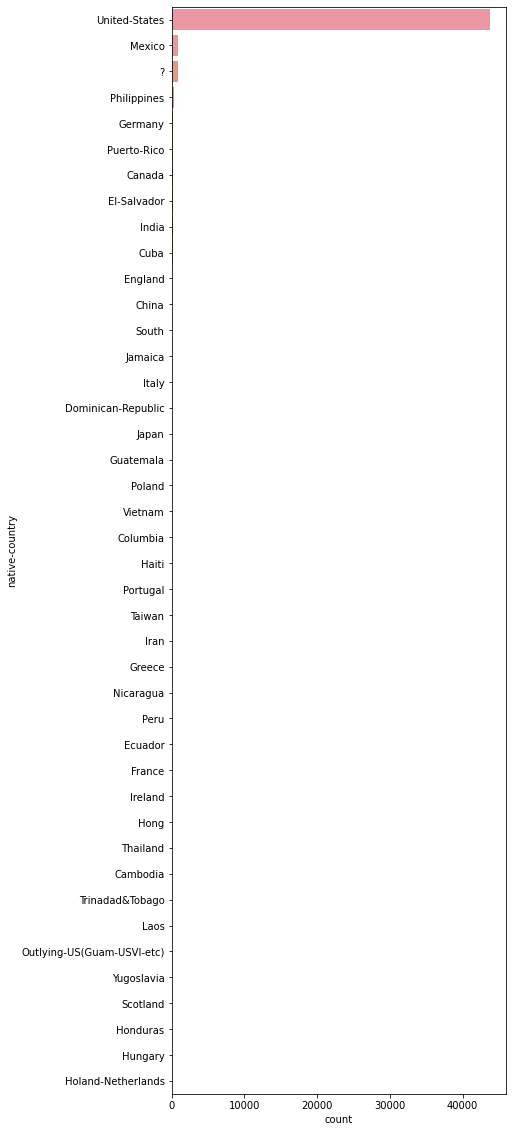

In [ ]:
plt.figure(figsize=(6,20))
sns.countplot(y = data['native-country'],order=data['native-country'].value_counts().index)
plt.show()

Mainily people's are from United State and Mexico.

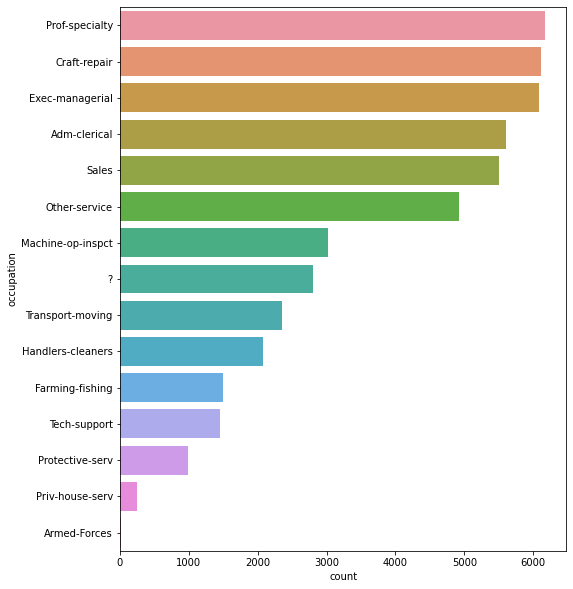

In [ ]:
plt.figure(figsize=(8,10))
sns.countplot(y = data['occupation'], order=data['occupation'].value_counts().index)
plt.show()

Top 3 occupations are Prof-specialty, Craft-repair and Exec-managerial.

And least 3 occupations are Protective-serv, Priv-house-serv and Armed-Forces.

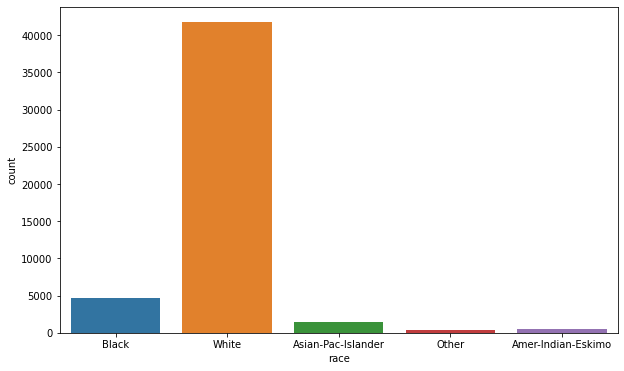

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['race'])
plt.show()

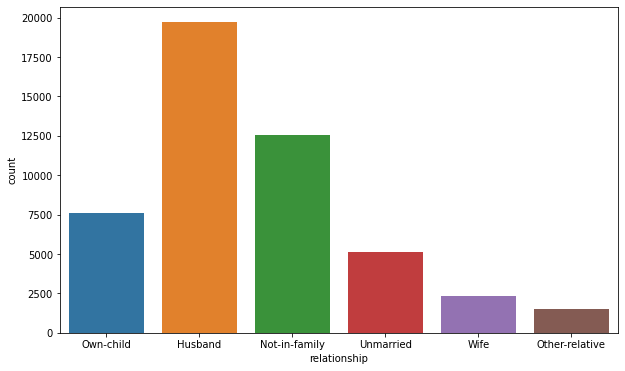

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['relationship'])
plt.show()

Most of the person's are married.

# Bivariate Analysis

In [ ]:
age = pd.cut(data['age'],[0,30,60,100])

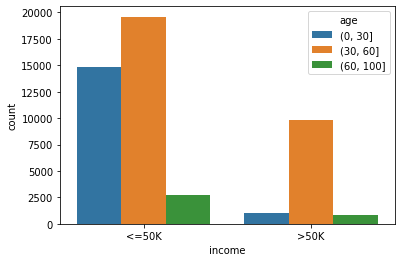

In [ ]:
sns.countplot(data['income'],hue = age)

Person whose age is from 30 to 60 have mixed income, wheater more person who have income less than and equall to 50k are from age group 0 to 30. 

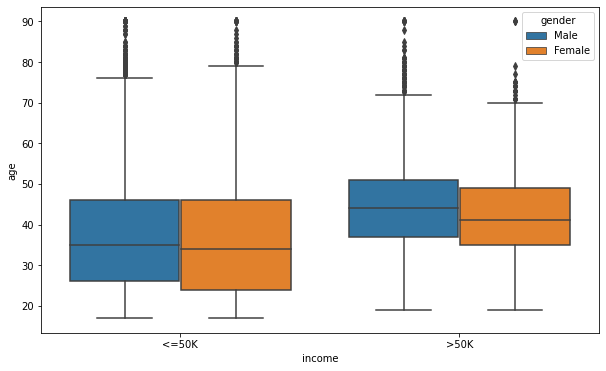

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = data['income'], y = data['age'], hue = data['gender'])
plt.show()

Average income of females are nearly equal to average income of males.

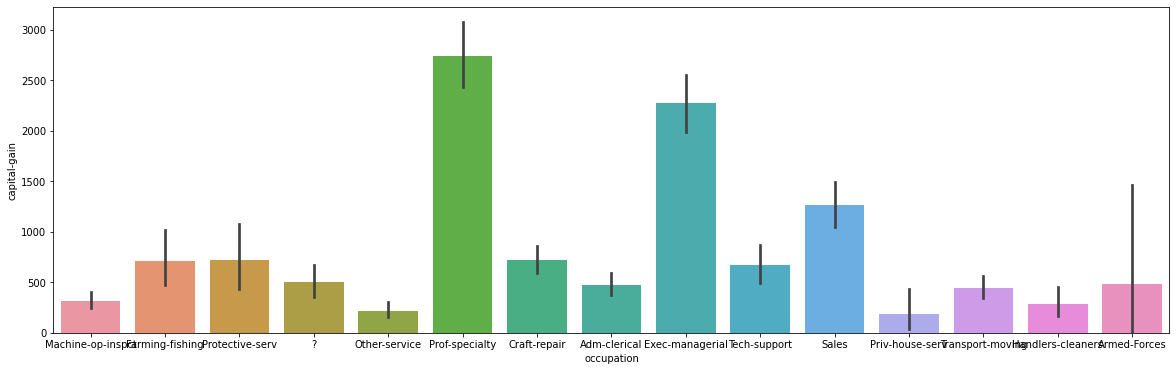

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['occupation'], y = data['capital-gain'])
plt.show()

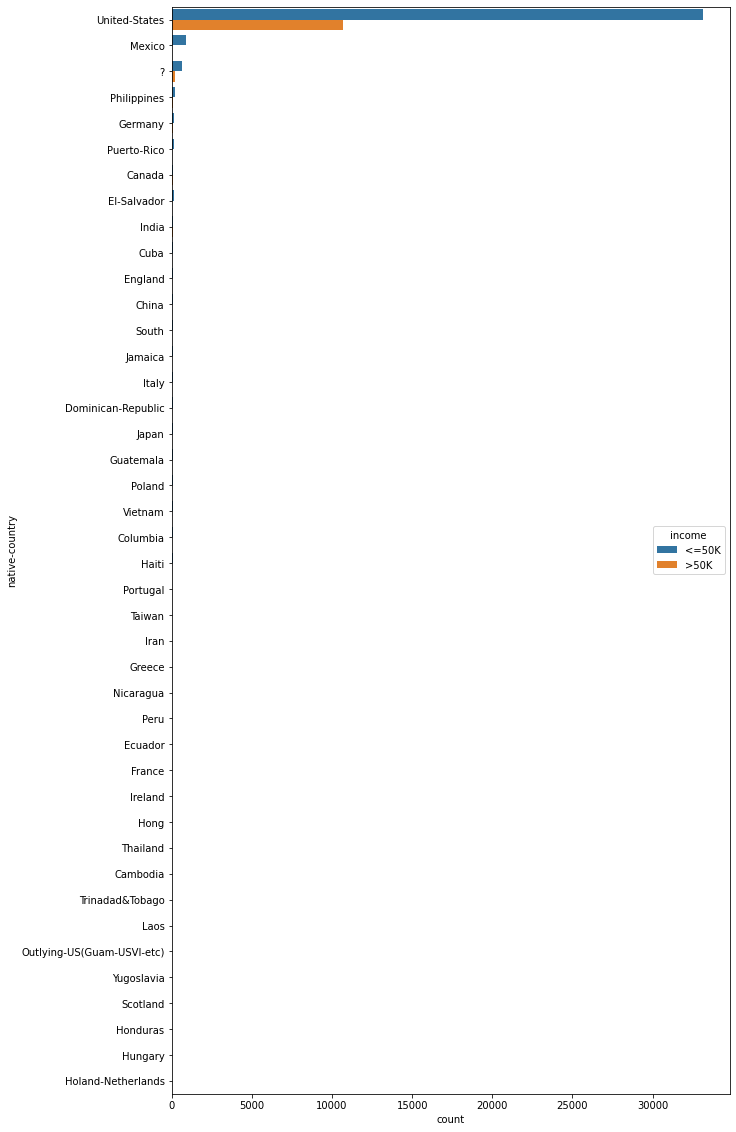

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(y = data['native-country'], hue = data['income'],order=data['native-country'].value_counts().index)
plt.show()

# Handling Outliers

In [ ]:
Q1 = data[num_feat].quantile(0.25)
Q3 = data[num_feat].quantile(0.75)
IQR = Q3 - Q1
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
df = data[~((data[num_feat] < ll)|(data[num_feat] > ul)).any(axis=1)]

In [ ]:
df.head(4)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


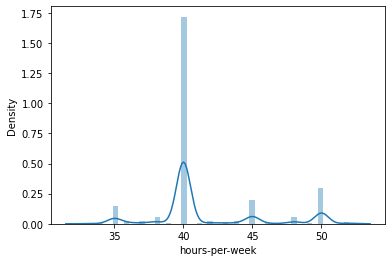

In [ ]:
sns.distplot(df['hours-per-week'])

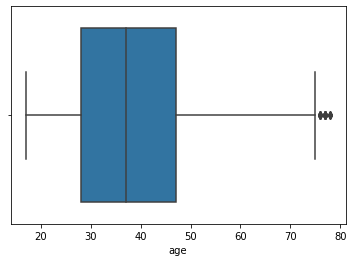

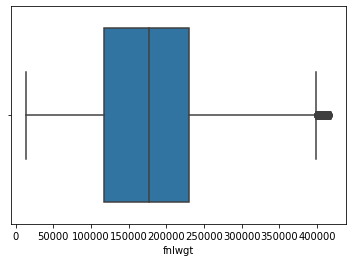

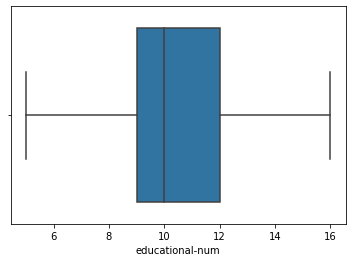

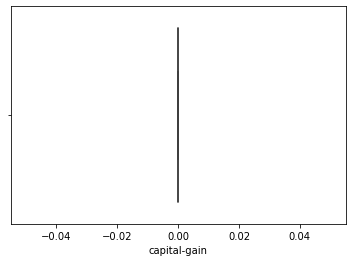

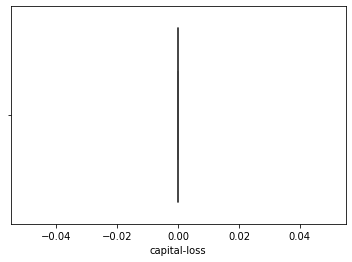

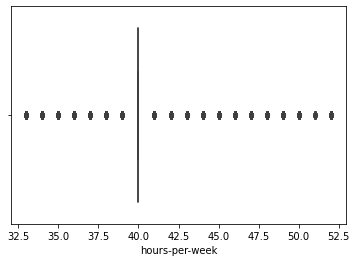

In [ ]:
for i in num_feat:
  plt.figure(i)
  sns.boxplot(df[i])

In [ ]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'State-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df = df.replace("?","other")

In [ ]:
df['occupation'].value_counts()

Craft-repair         4214
Adm-clerical         3836
Exec-managerial      3546
Prof-specialty       3501
Sales                2866
Other-service        2406
Machine-op-inspct    2138
Transport-moving     1347
Handlers-cleaners    1258
other                1151
Tech-support          955
Protective-serv       633
Farming-fishing       623
Priv-house-serv        73
Armed-Forces           11
Name: occupation, dtype: int64

In [ ]:
df['occupation'] = df['occupation'].replace("other","Other-services")

In [ ]:
df['native-country'].value_counts()

United-States                 25904
other                           495
Mexico                          337
Philippines                     195
Germany                         128
Puerto-Rico                     115
Canada                           94
India                            90
Cuba                             81
Jamaica                          74
China                            69
England                          69
Poland                           60
El-Salvador                      58
South                            56
Italy                            55
Dominican-Republic               54
Japan                            53
Vietnam                          53
Columbia                         51
Haiti                            42
Portugal                         39
Taiwan                           37
Guatemala                        35
Iran                             32
Peru                             25
Ireland                          24
Nicaragua                   

# Handling Categorical and Numerical variables

In [ ]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.head(4)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_other,education_11th,education_12th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Other-services,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_other
0,25,226802,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,29,227026,9,0,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.shape

(28558, 96)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df[num_feat] = MinMaxScaler().fit_transform(np.array(df[num_feat]))

In [ ]:
df.head(4)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_other,education_11th,education_12th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Other-services,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_other
0,0.131148,0.527441,0.181818,0.0,0.0,0.368421,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.344262,0.188277,0.363636,0.0,0.0,0.894737,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.180328,0.800155,0.636364,0.0,0.0,0.368421,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.196721,0.527996,0.363636,0.0,0.0,0.368421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Spliting Dataset into training and test data

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
y.head(5)

0    0
1    0
2    1
6    0
8    0
Name: income, dtype: int64

In [ ]:
X.head(4)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_other,education_11th,education_12th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Other-services,occupation_Priv-house-serv,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_other
0,0.131148,0.527441,0.181818,0.0,0.0,0.368421,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.344262,0.188277,0.363636,0.0,0.0,0.894737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.180328,0.800155,0.636364,0.0,0.0,0.368421,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.196721,0.527996,0.363636,0.0,0.0,0.368421,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_lr = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr_cm = confusion_matrix(y_test,y_lr)
lr_cm

array([[6320,  471],
       [ 897,  880]])

In [ ]:
lr_acc = accuracy_score(y_test,y_lr)
lr_acc

0.8403361344537815

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_knn = knn.predict(X_test)

In [ ]:
knn_cm = confusion_matrix(y_test,y_knn)
knn_cm

array([[6168,  623],
       [ 848,  929]])

In [ ]:
knn_acc = accuracy_score(y_test,y_knn)
knn_acc

0.8283146591970122

## Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC
svc  =SVC(kernel='linear',random_state=0)
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_svc = svc.predict(X_test)

In [ ]:
svc_cm = confusion_matrix(y_test,y_svc)
svc_cm

array([[6376,  415],
       [1032,  745]])

In [ ]:
svc_acc = accuracy_score(y_test,y_svc)
svc_acc

0.8311157796451915

## Kernel SVM

In [ ]:
svc_ker  =SVC(kernel='rbf',random_state=0)
svc_ker.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_svc_ker = svc_ker.predict(X_test)

In [ ]:
svc_ker_cm = confusion_matrix(y_test,y_svc_ker)
svc_ker_cm

array([[6356,  435],
       [ 950,  827]])

In [ ]:
svc_kr_acc = accuracy_score(y_test,y_svc_ker)
svc_kr_acc

0.8383520074696545

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_nb = nb.predict(X_test)

In [ ]:
nb_cm = confusion_matrix(y_test,y_nb)
nb_cm

array([[2342, 4449],
       [  71, 1706]])

In [ ]:
nb_acc = accuracy_score(y_test,y_nb)
nb_acc

0.47245564892623715

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_dt = dt.predict(X_test)

In [ ]:
dt_cm = confusion_matrix(y_test,y_dt)
dt_cm

array([[5868,  923],
       [ 858,  919]])

In [ ]:
dt_acc = accuracy_score(y_test,y_dt)
dt_acc

0.7921335200746965

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators  = 10, criterion = 'entropy',random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_rf = rf.predict(X_test)

In [ ]:
rf_cm = confusion_matrix(y_test,y_rf)
rf_cm

array([[6242,  549],
       [ 969,  808]])

In [ ]:
rf_acc = accuracy_score(y_test,y_rf)
rf_acc

0.822829131652661

## XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_xgb  =xgb.predict(X_test)

In [ ]:
xgb_cm = confusion_matrix(y_test,y_xgb)
xgb_cm

array([[6362,  429],
       [ 919,  858]])

In [ ]:
xgb_acc = accuracy_score(y_test,y_xgb)
xgb_acc

0.8426704014939309

In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.30,0.5,0.7,1,10],
    "max_depth" : [3,4,5,6,8,10,12],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7,1]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions = params, n_iter = 5,
                                  scoring = "roc_auc",n_jobs = -1, cv = 5, verbose = 3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xg.fit(X_train,y_train)
y_xg  =xg.predict(X_test)

In [ ]:
xg_cm = confusion_matrix(y_test,y_xg)
xg_cm

array([[6349,  442],
       [ 898,  879]])

In [ ]:
xg_acc = accuracy_score(y_test,y_xg)
xg_acc

0.8436041083099907

# Accuracy table of each model

In [ ]:
from tabulate import tabulate
score = {'Classifier':['Logistic Regression','KNN','SVM','Kernel-SVM','Naive Bayes','Decision Tree',
                        'Random Forest','XGBoost','Tunned XGBoost'],
          'Scores':[lr_acc,knn_acc,svc_acc,svc_kr_acc,nb_acc,dt_acc,rf_acc,xgb_acc,xg_acc]}
scores = pd.DataFrame(score)
scores

,Classifier,Scores
0,Logistic Regression,0.840336
1,KNN,0.828315
2,SVM,0.831116
3,Kernel-SVM,0.838352
4,Naive Bayes,0.472456
5,Decision Tree,0.792134
6,Random Forest,0.822829
7,XGBoost,0.842670
8,Tunned XGBoost,0.843604
